<a href="https://colab.research.google.com/github/PsCushman/baseball-rule-changes/blob/PSC/batter_learning_nn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler
from google.colab import drive
drive.mount('/content/drive')

#  Import and read the charity_data.csv.
file_path = '/content/drive/My Drive/Colab_Notebooks/off_output_for_learning.csv'
batter_woba_df = pd.read_csv(file_path)
batter_woba_df.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,IDfg,Name,Age,G,AB,PA,H,1B,2B,3B,...,Events,CStr%,CSW%,xBA,xSLG,xwOBA,L-WAR,avg_wOBA,wOBA_2023,zscore_difference
0,1744,Miguel Cabrera,37.666667,126.000000,454.000000,502.666667,120.333333,94.000000,15.666667,0.000000,...,351.333333,0.152667,0.268000,0.246000,0.395667,0.307000,-0.766667,0.299333,0.293,0.055586
1,2136,David Peralta,32.666667,127.666667,436.000000,483.666667,113.666667,68.666667,29.666667,4.666667,...,341.333333,0.157000,0.266333,0.246000,0.374333,0.303333,1.266667,0.322333,0.311,-0.189938
2,2396,Carlos Santana,34.666667,149.000000,523.000000,617.000000,123.000000,77.666667,21.000000,0.333333,...,426.666667,0.166333,0.249000,0.254333,0.446333,0.351333,1.766667,0.327333,0.307,-0.449445
3,2434,Nelson Cruz,39.666667,128.000000,471.666667,537.333333,127.333333,78.333333,21.000000,0.333333,...,354.000000,0.127333,0.271667,0.265000,0.516000,0.366000,1.800000,0.351667,0.291,-1.622077
4,2967,Tommy Pham,32.666667,148.000000,532.000000,612.333333,131.666667,85.666667,26.666667,1.666667,...,396.000000,0.204333,0.289000,0.253667,0.425333,0.338333,1.733333,0.323667,0.343,0.602240


In [2]:
# Drop the 'Name', IDfg, 'wOBA_2023' so it is not part of the classifacation and regression.
batter_woba_df.drop(['Name', 'IDfg', 'wOBA_2023'], axis=1, inplace=True)
batter_woba_df_encoded = batter_woba_df.copy()
batter_woba_df_encoded['zscore_difference'] = batter_woba_df_encoded['zscore_difference'].apply(lambda x: 1 if x > 0 else 0)

In [3]:
batter_woba_df_encoded.dropna(axis=1, inplace=True)
batter_woba_df_encoded.head()


,Age,G,AB,PA,H,1B,2B,3B,HR,R,...,HardHit%,Events,CStr%,CSW%,xBA,xSLG,xwOBA,L-WAR,avg_wOBA,zscore_difference
0,37.666667,126.000000,454.000000,502.666667,120.333333,94.000000,15.666667,0.000000,10.666667,38.0,...,0.438667,351.333333,0.152667,0.268000,0.246000,0.395667,0.307000,-0.766667,0.299333,1
1,32.666667,127.666667,436.000000,483.666667,113.666667,68.666667,29.666667,4.666667,10.666667,48.0,...,0.422000,341.333333,0.157000,0.266333,0.246000,0.374333,0.303333,1.266667,0.322333,0
2,34.666667,149.000000,523.000000,617.000000,123.000000,77.666667,21.000000,0.333333,24.000000,76.0,...,0.438667,426.666667,0.166333,0.249000,0.254333,0.446333,0.351333,1.766667,0.327333,0
3,39.666667,128.000000,471.666667,537.333333,127.333333,78.333333,21.000000,0.333333,27.666667,70.0,...,0.497000,354.000000,0.127333,0.271667,0.265000,0.516000,0.366000,1.800000,0.351667,0
4,32.666667,148.000000,532.000000,612.333333,131.666667,85.666667,26.666667,1.666667,17.666667,80.0,...,0.466000,396.000000,0.204333,0.289000,0.253667,0.425333,0.338333,1.733333,0.323667,1


In [4]:
# Split our preprocessed data into our features and target arrays
X = batter_woba_df_encoded.drop('zscore_difference', axis=1)  # Features (remove the target column)
y = batter_woba_df_encoded['zscore_difference']              # Target

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shapes of the training and testing datasets
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (243, 247)
X_test shape: (61, 247)
y_train shape: (243,)
y_test shape: (61,)


In [5]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

RandomForestClassifier()

In [6]:
# Get feature importances
feature_importances = rf.feature_importances_

# Print feature importances
for feature_name, importance in zip(X_train.columns, feature_importances):
    print(f"{feature_name}: {importance}")

Age: 0.004304990364715834
G: 0.0031095522737646913
AB: 0.0023004561036030066
PA: 0.0016086163508423044
H: 0.002378411841259006
1B: 0.0021928150140559824
2B: 0.0028068275503118426
3B: 0.002884262382384327
HR: 0.0023626515738773457
R: 0.002579465905037392
RBI: 0.005690798389195207
BB: 0.0035959649252203397
IBB: 0.0013206124018178417
SO: 0.0022326828983462482
HBP: 0.0025614962798316035
SF: 0.0016598900691153198
SH: 0.000983717891346686
GDP: 0.0013534863433073553
SB: 0.00274921233591911
CS: 0.0030105957965391276
AVG: 0.018336771154348553
GB: 0.0032692782741026204
FB: 0.0025322053688409127
LD: 0.0012920832114902366
IFFB: 0.0007339898515913485
Pitches: 0.0010547955322218383
Balls: 0.003071061671860214
Strikes: 0.0014974323446981241
IFH: 0.003047746801058418
BU: 0.0012379484304350175
BUH: 0.001218890562991778
BB%: 0.005655184145001472
K%: 0.004128743183842007
BB/K: 0.0026600178220244548
OBP: 0.011052660225787202
SLG: 0.006937717667169949
OPS: 0.010449444453310865
ISO: 0.0048491703008280386
BA

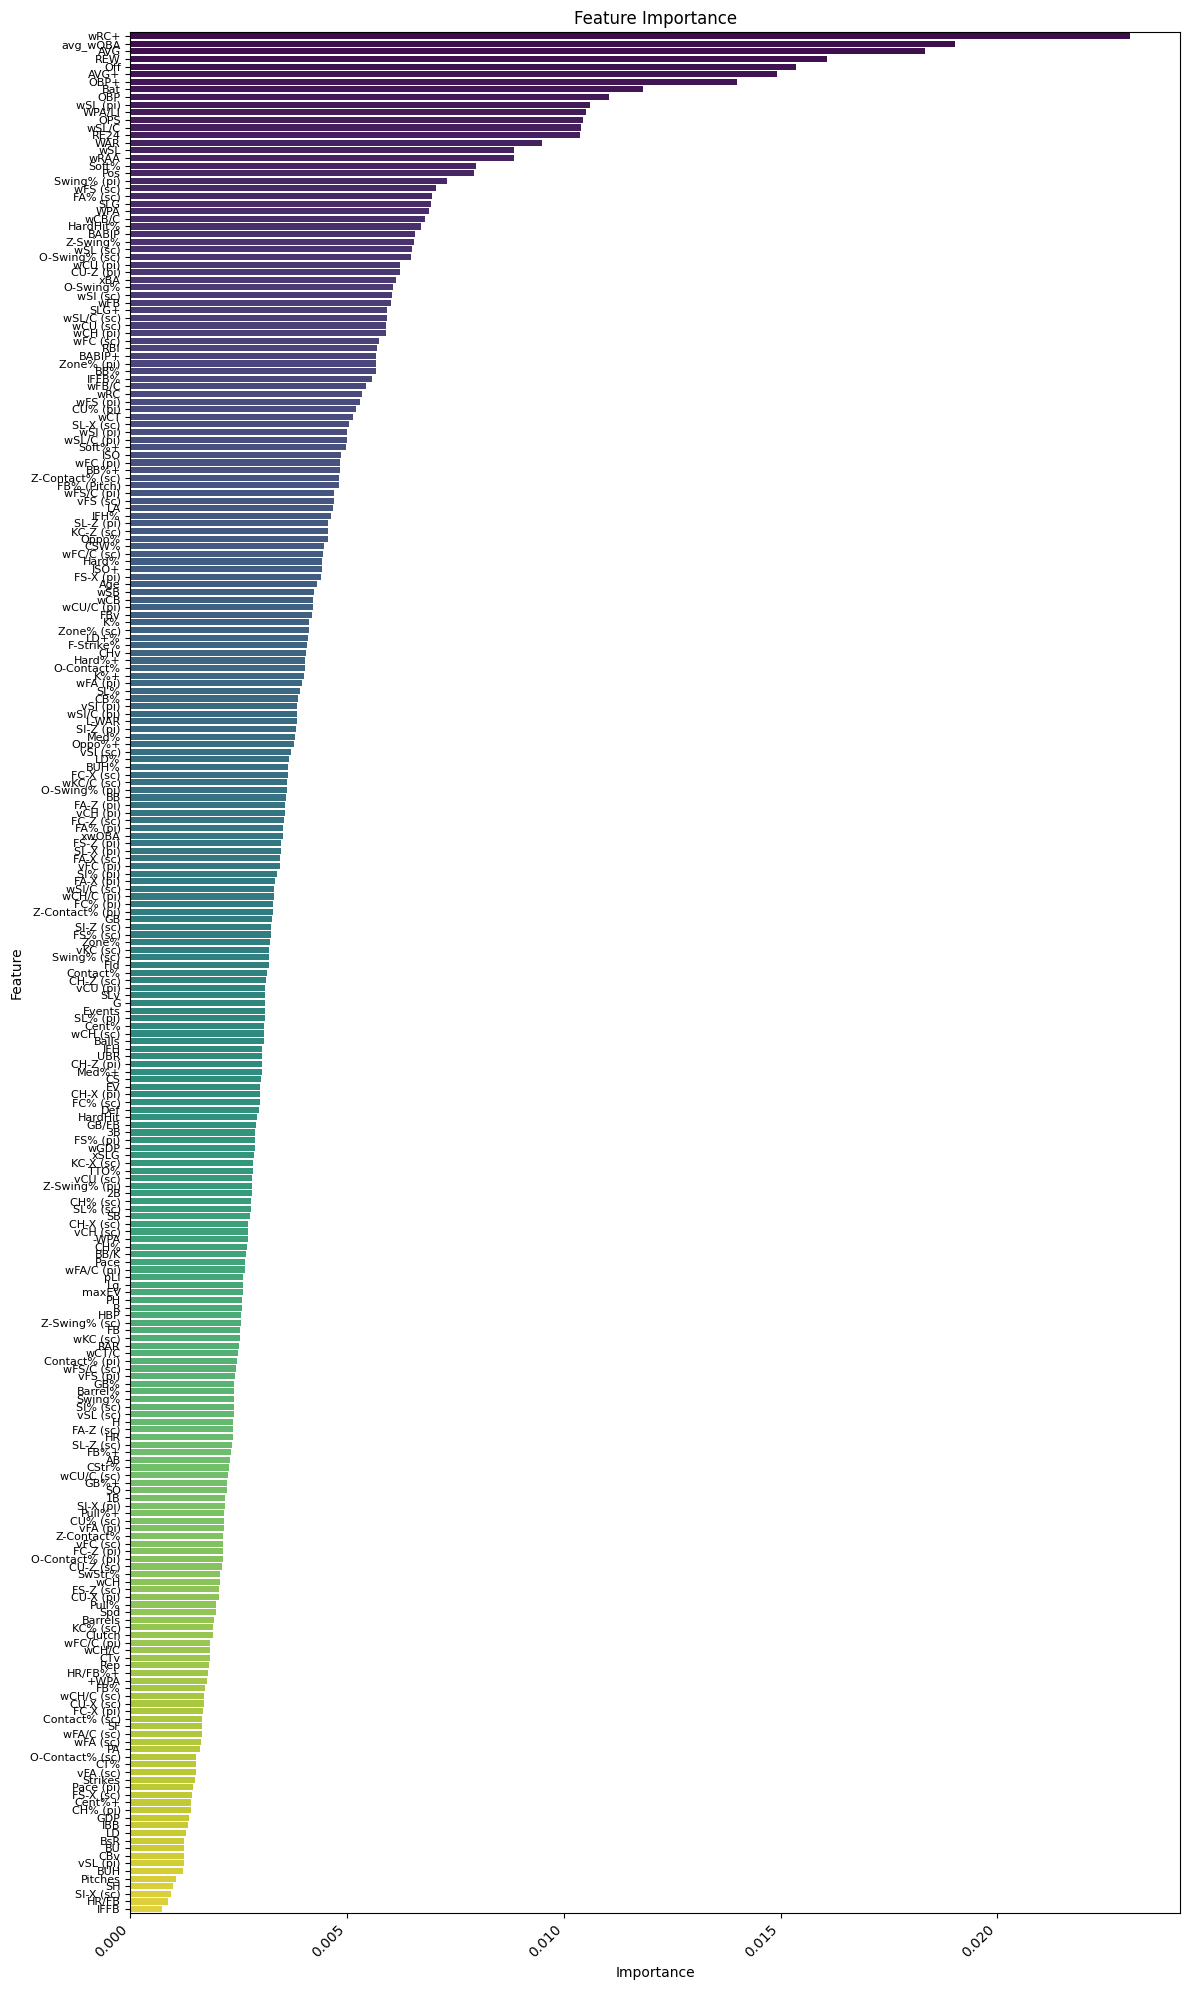

In [7]:
feature_importances = rf.feature_importances_
feature_names = X_train.columns

# Create a DataFrame
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})

# Sort the DataFrame by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(12, 20))  # Increase the height value to make the figure taller
ax = sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette="viridis")
ax.set_xlabel('Importance')
ax.set_ylabel('Feature')
ax.set_title('Feature Importance')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha="right")

# Adjust font size of y-axis labels
plt.yticks(fontsize=8)

plt.tight_layout()
plt.show()

In [8]:
# Convert your DataFrame to a NumPy array
X_train_np = X_train.to_numpy()
X_test_np = X_test.to_numpy()

num_top_features = 240
top_feature_indices = feature_importances.argsort()[-num_top_features:][::-1]
selected_X_train = X_train_np[:, top_feature_indices]
selected_X_test = X_test_np[:, top_feature_indices]

# Create a new y_train corresponding to selected features
selected_y_train = y_train.to_numpy()

In [9]:
# Display the shapes of the training and testing datasets
print("Selected X_train shape:", selected_X_train.shape)
print("Selected X_test shape:", selected_X_test.shape)
print("Selected y_train shape:", selected_y_train.shape)

Selected X_train shape: (243, 240)
Selected X_test shape: (61, 240)
Selected y_train shape: (243,)


In [10]:
# Create a StandardScaler instance
scaler = StandardScaler()

# Fit the StandardScaler on the training data
X_scaler = scaler.fit(selected_X_train)

# Scale the training and test data
selected_X_train_scaled = X_scaler.transform(selected_X_train)
selected_X_test_scaled = X_scaler.transform(selected_X_test)

print("Selected X_train shape:", selected_X_train_scaled.shape)
print("Selected X_test shape:", selected_X_test_scaled.shape)
print("Selected y_train shape:", selected_y_train.shape)

Selected X_train shape: (243, 240)
Selected X_test shape: (61, 240)
Selected y_train shape: (243,)


In [11]:
# Instantiate the random oversampler model
oversampler = RandomOverSampler(random_state=1)

# Fit the scaled training data to the random oversampler model
selected_X_train_resampled, selected_y_train_resampled = oversampler.fit_resample(selected_X_train_scaled, selected_y_train)

In [12]:
from tensorflow.keras.callbacks import Callback

class SaveWeightsCallback(Callback):
    def __init__(self):
        super(SaveWeightsCallback, self).__init__()

    def on_epoch_end(self, epoch, logs=None):
        if epoch % 5 == 0:  # Save weights every five epochs
            self.model.save_weights(f'weights_epoch_{epoch}.h5')
            print(f'Saved weights at epoch {epoch}')

In [13]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
nn = Sequential()

unit_1 = 7

# First hidden layer
nn.add(Dense(units=unit_1, input_dim=selected_X_train_resampled.shape[1], activation='relu'))

# Output layer
nn.add(Dense(units=1, activation='sigmoid'))

# Check the structure of the model
nn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 7)                 1687      
                                                                 
 dense_1 (Dense)             (None, 1)                 8         
                                                                 
Total params: 1,695
Trainable params: 1,695
Non-trainable params: 0
_________________________________________________________________


In [14]:
# Compile the model
nn.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [15]:
# Train the model
history = nn.fit(selected_X_train_resampled, selected_y_train_resampled, epochs=50, verbose=1, callbacks=[SaveWeightsCallback()])

Epoch 1/50
8/8 [==============================] - 3s 13ms/step - loss: 1.0664 - accuracy: 0.4921
Epoch 2/50
8/8 [==============================] - 0s 7ms/step - loss: 0.9450 - accuracy: 0.5000
Epoch 3/50
8/8 [==============================] - 0s 10ms/step - loss: 0.8558 - accuracy: 0.5157
Epoch 4/50
8/8 [==============================] - 0s 6ms/step - loss: 0.7951 - accuracy: 0.5394
Epoch 5/50
8/8 [==============================] - 0s 6ms/step - loss: 0.7552 - accuracy: 0.5827
Epoch 6/50
8/8 [==============================] - 0s 12ms/step - loss: 0.7216 - accuracy: 0.6024
Epoch 7/50
8/8 [==============================] - 0s 9ms/step - loss: 0.6899 - accuracy: 0.6378
Epoch 8/50
8/8 [==============================] - 0s 11ms/step - loss: 0.6647 - accuracy: 0.6496
Epoch 9/50
8/8 [==============================] - 0s 6ms/step - loss: 0.6384 - accuracy: 0.6693
Epoch 10/50
8/8 [==============================] - 0s 6ms/step - loss: 0.6142 - accuracy: 0.7008
Epoch 11/50
8/8 [==================

In [16]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(selected_X_test_scaled, y_test, verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

2/2 - 1s - loss: 0.7532 - accuracy: 0.5902 - 933ms/epoch - 467ms/step
Loss: 0.7531813979148865, Accuracy: 0.5901639461517334
